In [1]:
import geocoder
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

key = open('../googlekey.txt').read()

steekproef = pd.ExcelFile("/Users/rikhoekstra/surfdrive/emigratie/emigrantenkaarten/migrant_steekproef_masterdb_20180629.xlsx")
steekproef.sheet_names



['emmigrantunits',
 'emcards',
 'emtravels',
 'emwaardeoordeels',
 'emimages',
 'emevents',
 'emactors',
 'emactorinstitutions',
 'lookup_instellingen',
 'emeventtypes',
 'emcardcatalogs',
 'emconsulates',
 'emvervoermiddels',
 'emtypevervoers',
 'emschemas',
 'emlocations',
 'emreligions',
 'orig',
 'reserve']

In [2]:
import geopandas as gpd

In [3]:
units = steekproef.parse('emmigrantunits')
units = units.drop(units.index[:2])
units.head()

,persoonsId,initialen,tussenvoegsel,achternaam,geboortejaar,hasBirthPlace,hasResidenceLocation,hasSchema,hasUnit,samenstelling,geslacht,hasReligion,adresAantal,eventsAantal,is_duplicaat,duplicaten bevatten afwijkende gegevens,Heeft geen correct id
134,34120.0,J.A.M.,NaN,Boschker,1932,NaN,Aalten,NAMA,6,Gezin,NaN,RK,3,3,NaN,NaN,NaN
295,46567.0,N.J.,NaN,Schipper,1933,NaN,Abbekerk,NAMA,1,Alleen,Man,RK,1,1,NaN,NaN,NaN
403,3053.0,Th.H.A.,van den,Broek,1914,NaN,Afferden,NAMA,7,Gezin,NaN,RK,2,7,NaN,NaN,NaN
439,5515.0,L.F.,van,Esseveld,1892,Oosbaan,Alkmaar,LP,2,Echtpaar,NaN,NH,4,6,NaN,NaN,NaN
58,27092.0,G.,de,Kroon,1916,NaN,Alkmaar,NGSS,6,Gezin,NaN,Geref.,1,0,NaN,NaN,NaN


In [4]:
#places = units.hasResidenceLocation.unique()
# get the geocode for places but this refuses to resolve much, so we did it differently
#res = []
#for p in places:
#    g = geocoder.google(p, key=key)
#    res.append({p: g.geojson})
#res

In [5]:
places = pd.read_csv('places.csv', sep=";", decimal=",") # note the decimal separator
places.drop([c for c in places.columns if "Unnamed" in c], axis=1, inplace=True)

In [6]:
places['geometry'] = [Point(xy) for xy in zip(places.longitude, places.latitude)]
places

,placename,latitude,longitude,geometry
0,Aalten,51.923874,6.578990,POINT (6.578989999999999 51.923874)
1,Abbekerk,52.730781,5.016458,POINT (5.016458 52.73078100000001)
2,Afferden,51.635102,6.036392,POINT (6.036392 51.635102)
3,Alkmaar,52.633852,4.743524,POINT (4.743524 52.633852)
4,Almelo,52.351922,6.660562,POINT (6.660562 52.35192199999999)
5,Alphen aan den Rijn,52.130597,4.674371,POINT (4.674371 52.13059699999999)
6,Amby,50.859959,5.731146,POINT (5.731146 50.859959)
7,Amsterdam,52.372430,4.899730,POINT (4.89973 52.37243)
8,Apeldoorn,52.207918,5.958917,POINT (5.958917 52.207918)
9,Arnhem,51.991032,5.915834,POINT (5.915833999999999 51.991032)


In [7]:
geod_units = pd.merge(units, places, left_on=units.hasResidenceLocation, right_on="placename", how="left")

In [8]:
crs = {'init': 'epsg:3395'} # let's assume that's the projection
geometry = [Point(xy) for xy in zip(geod_units.longitude, geod_units.latitude)]
geometry[:5]

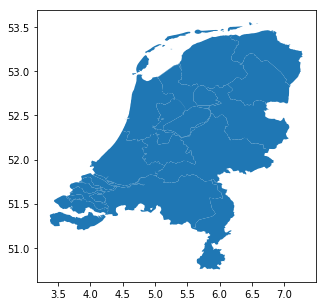

In [9]:
neth = gpd.read_file("/Users/rikhoekstra/Downloads/NLD_adm/NLD_adm1.shp") # level 1 is the provinces, which is ok
neth.to_crs(crs)
fig, ax = plt.subplots(figsize=(5,5))
neth.plot(ax=ax)

In [10]:
geo_units = gpd.GeoDataFrame(geod_units,
                             crs = crs,
                             geometry=geometry)
geo_units.head()

,persoonsId,initialen,tussenvoegsel,achternaam,geboortejaar,hasBirthPlace,hasResidenceLocation,hasSchema,hasUnit,samenstelling,...,hasReligion,adresAantal,eventsAantal,is_duplicaat,duplicaten bevatten afwijkende gegevens,Heeft geen correct id,placename,latitude,longitude,geometry
0,34120.0,J.A.M.,NaN,Boschker,1932,NaN,Aalten,NAMA,6,Gezin,...,RK,3,3,NaN,NaN,NaN,Aalten,51.923874,6.578990,POINT (6.578989999999999 51.923874)
1,46567.0,N.J.,NaN,Schipper,1933,NaN,Abbekerk,NAMA,1,Alleen,...,RK,1,1,NaN,NaN,NaN,Abbekerk,52.730781,5.016458,POINT (5.016458 52.73078100000001)
2,3053.0,Th.H.A.,van den,Broek,1914,NaN,Afferden,NAMA,7,Gezin,...,RK,2,7,NaN,NaN,NaN,Afferden,51.635102,6.036392,POINT (6.036392 51.635102)
3,5515.0,L.F.,van,Esseveld,1892,Oosbaan,Alkmaar,LP,2,Echtpaar,...,NH,4,6,NaN,NaN,NaN,Alkmaar,52.633852,4.743524,POINT (4.743524 52.633852)
4,27092.0,G.,de,Kroon,1916,NaN,Alkmaar,NGSS,6,Gezin,...,Geref.,1,0,NaN,NaN,NaN,Alkmaar,52.633852,4.743524,POINT (4.743524 52.633852)


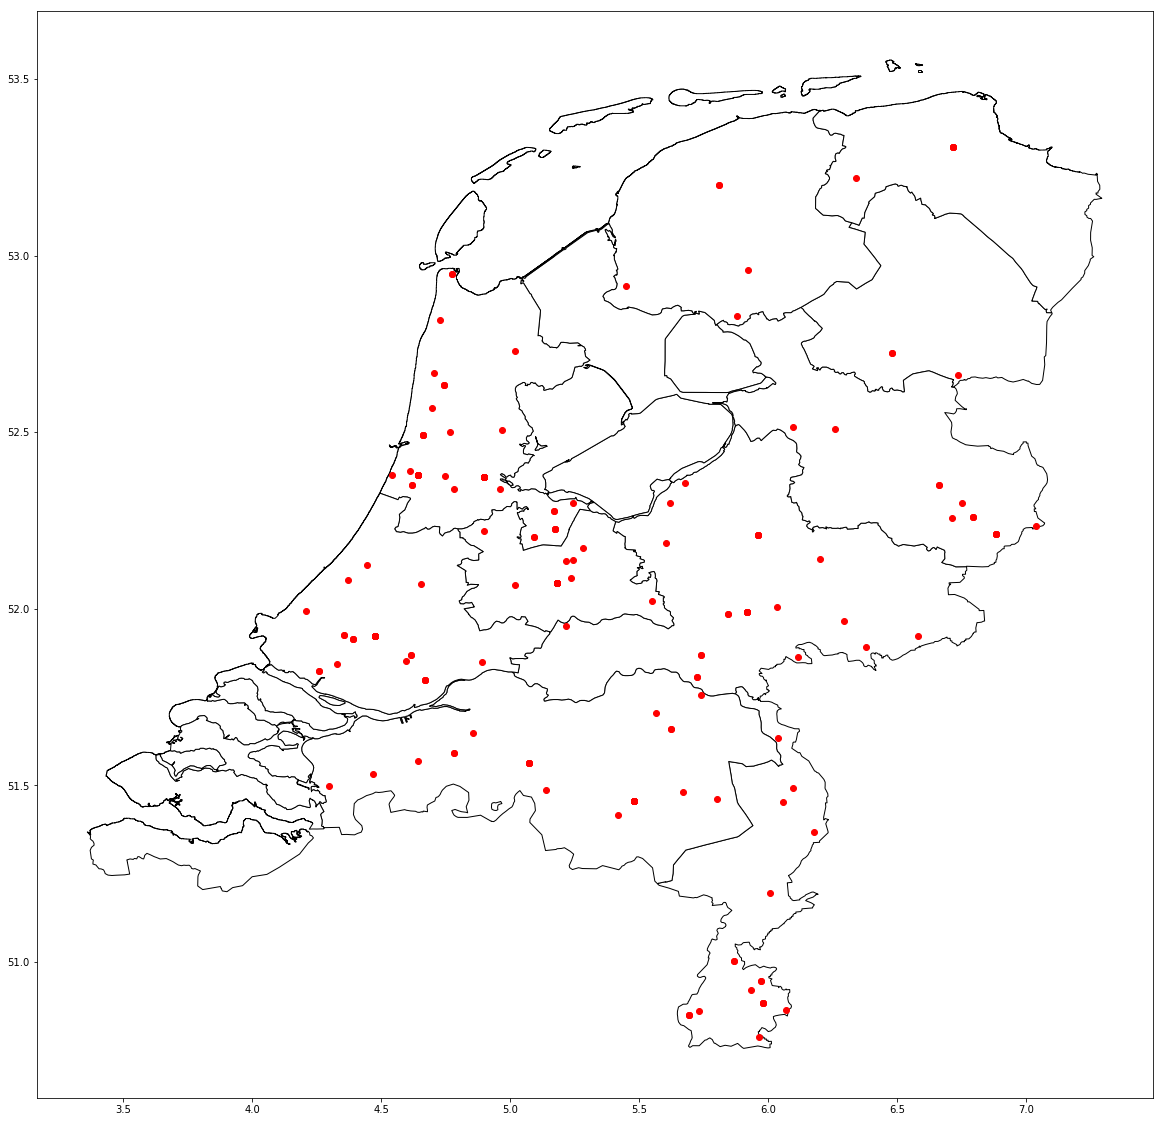

In [11]:
fig, ax = plt.subplots(figsize=(20,20))
neth.plot( color="white", edgecolor="black", ax=ax)
geo_units.plot(ax=ax, color="red")

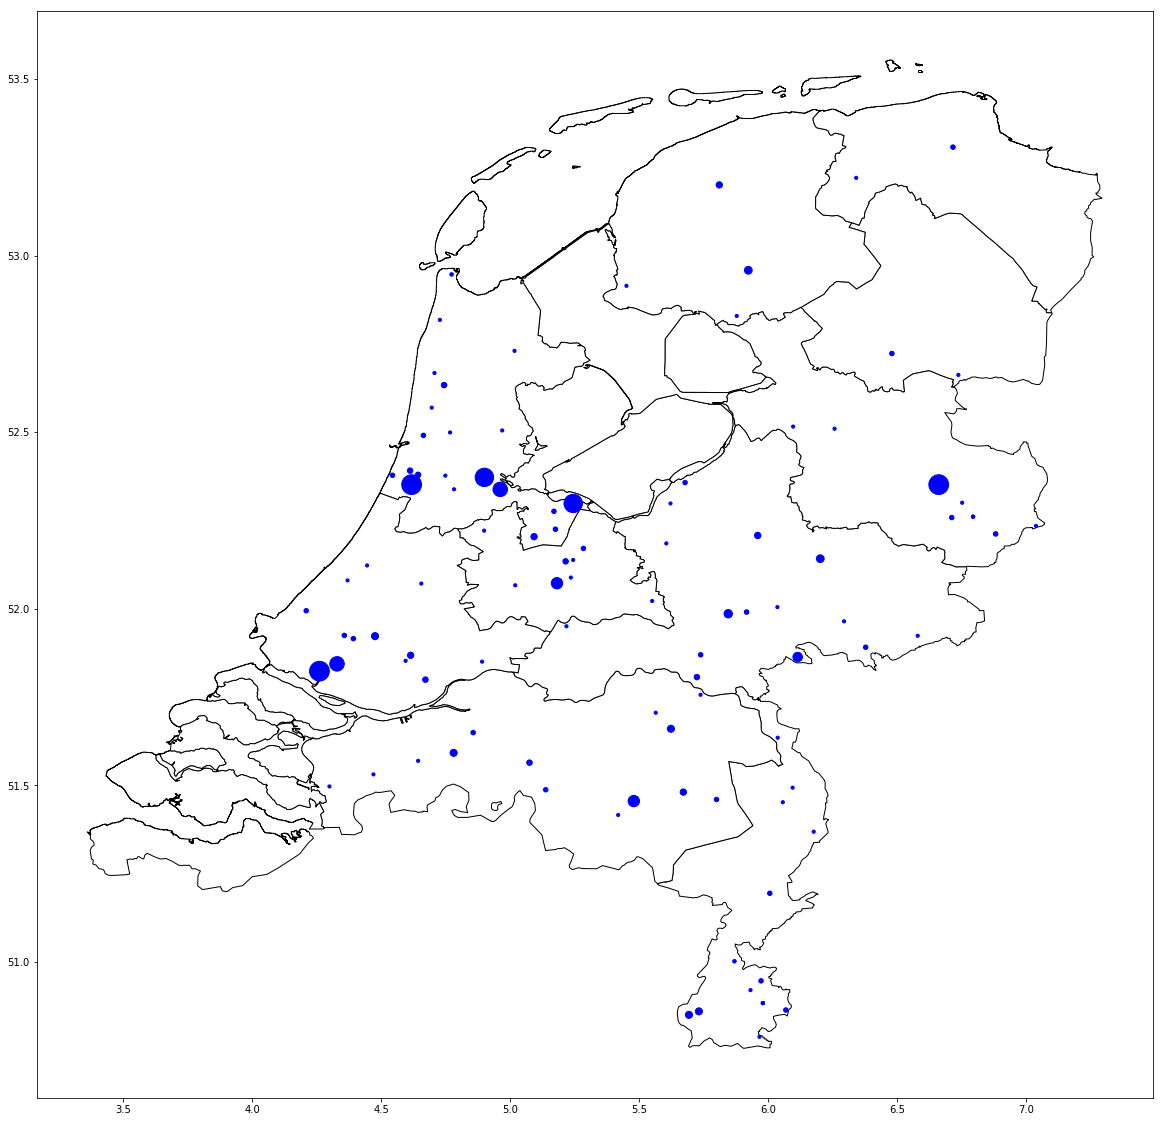

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
neth.plot( color="white", edgecolor="black", ax=ax)
geon = geo_units.dissolve(by=geo_units.placename, aggfunc='count')
geo_units.plot(color="blue", markersize=geon.placename * 10, ax=ax) # slightly inflate size of dots for better visual

In [13]:
#now add years for further differences
import numpy as np
ev = steekproef.parse('emtravels')
ev.loc[~ev.ar.isna()]
ev = ev.loc[~ev.ar.isin(['numeric', 'start', 'onbekend', 0, np.nan])]
ev.rename({'ar':'yr', '(c)':'persoonsId'}, axis=1, inplace=True)
ev.drop([c for c in ev.columns if c not in ['yr', 'persoonsId']], axis=1, inplace=True)
ev.persoonsId = ev.persoonsId.astype('int64')
ev.head()


,yr,persoonsId
8,1954,23805
77,1949,28391
89,1955,29367
91,1953,29561
114,1951,33391


In [14]:
ygeo_units = pd.merge(geo_units, ev, how="left")
ygeo_units.yr = pd.to_numeric(ygeo_units.yr)

In [15]:
step = 5
cats = pd.cut(ygeo_units.yr, range(1945, 1990, 5), labels=["%s-%s" % ( int(x)-step, x) for x in range(1945, 1990, step)[1:]])
cats.cat.categories

Index(['1945-1950', '1950-1955', '1955-1960', '1960-1965', '1965-1970',
       '1970-1975', '1975-1980', '1980-1985'],
      dtype='object')

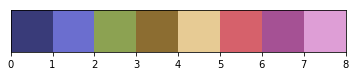

{'1945-1950': (0.2235294117647059,
  0.23137254901960785,
  0.4745098039215686,
  1.0),
 '1950-1955': (0.4196078431372549,
  0.43137254901960786,
  0.8117647058823529,
  1.0),
 '1955-1960': (0.5490196078431373,
  0.6352941176470588,
  0.3215686274509804,
  1.0),
 '1960-1965': (0.5490196078431373,
  0.42745098039215684,
  0.19215686274509805,
  1.0),
 '1965-1970': (0.9058823529411765, 0.796078431372549, 0.5803921568627451, 1.0),
 '1970-1975': (0.8392156862745098,
  0.3803921568627451,
  0.4196078431372549,
  1.0),
 '1975-1980': (0.6470588235294118,
  0.3176470588235294,
  0.5803921568627451,
  1.0),
 '1980-1985': (0.8705882352941177,
  0.6196078431372549,
  0.8392156862745098,
  1.0)}

In [16]:
# colormap, from https://stackoverflow.com/questions/14720331/how-to-generate-random-colors-in-matplotlib
def get_cmap(n, name='tab20b'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def clrmap(N=0):
    N = N
    fig=plt.figure()
    ax=fig.add_subplot(111)   
    plt.axis('scaled')
    ax.set_xlim([ 0, N])
    ax.set_ylim([-0.5, 0.5])
    cmap = get_cmap(N)
    for i in range(N):
        rect = plt.Rectangle((i, -0.5), 1, 1, facecolor=cmap(i))
        ax.add_artist(rect)
    ax.set_yticks([])
    plt.show()

clrmap(N=len(cats.cat.categories))

clrm = get_cmap(n=len(cats.cat.categories))
clrnames = {item[1]:clrm(item[0]) for item in enumerate(cats.cat.categories) if item!=np.nan}
clrnames


In [17]:
for item in cats.cat.categories:
    print(item, len(cats[cats == item]))

1945-1950 13
1950-1955 140
1955-1960 249
1960-1965 166
1965-1970 95
1970-1975 39
1975-1980 25
1980-1985 24


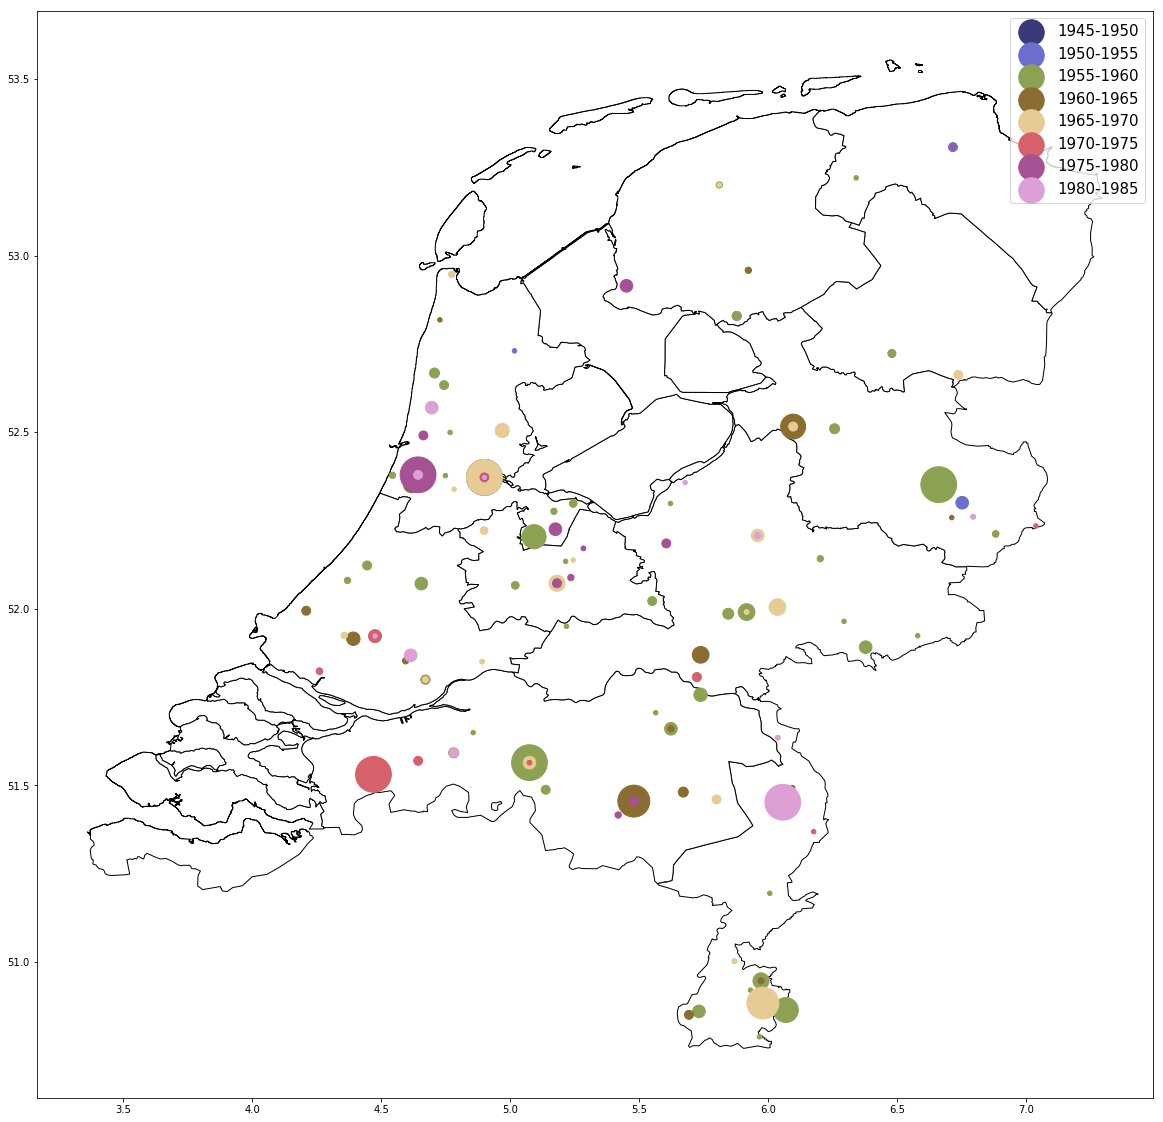

In [18]:
fig, ax = plt.subplots(figsize=(20,20))
neth.plot( color="white", edgecolor="black", ax=ax)
geon = ygeo_units.dissolve(by=ygeo_units.placename, aggfunc='count')
for item in cats.cat.categories:
    if item != np.nan:
        ygeo_units[cats == item].plot(
                    color=clrnames[item], markersize=geon.placename *20 , ax=ax, label=item) # slightly inflate size of dots for better visual
        plt.legend(prop={'size':15})

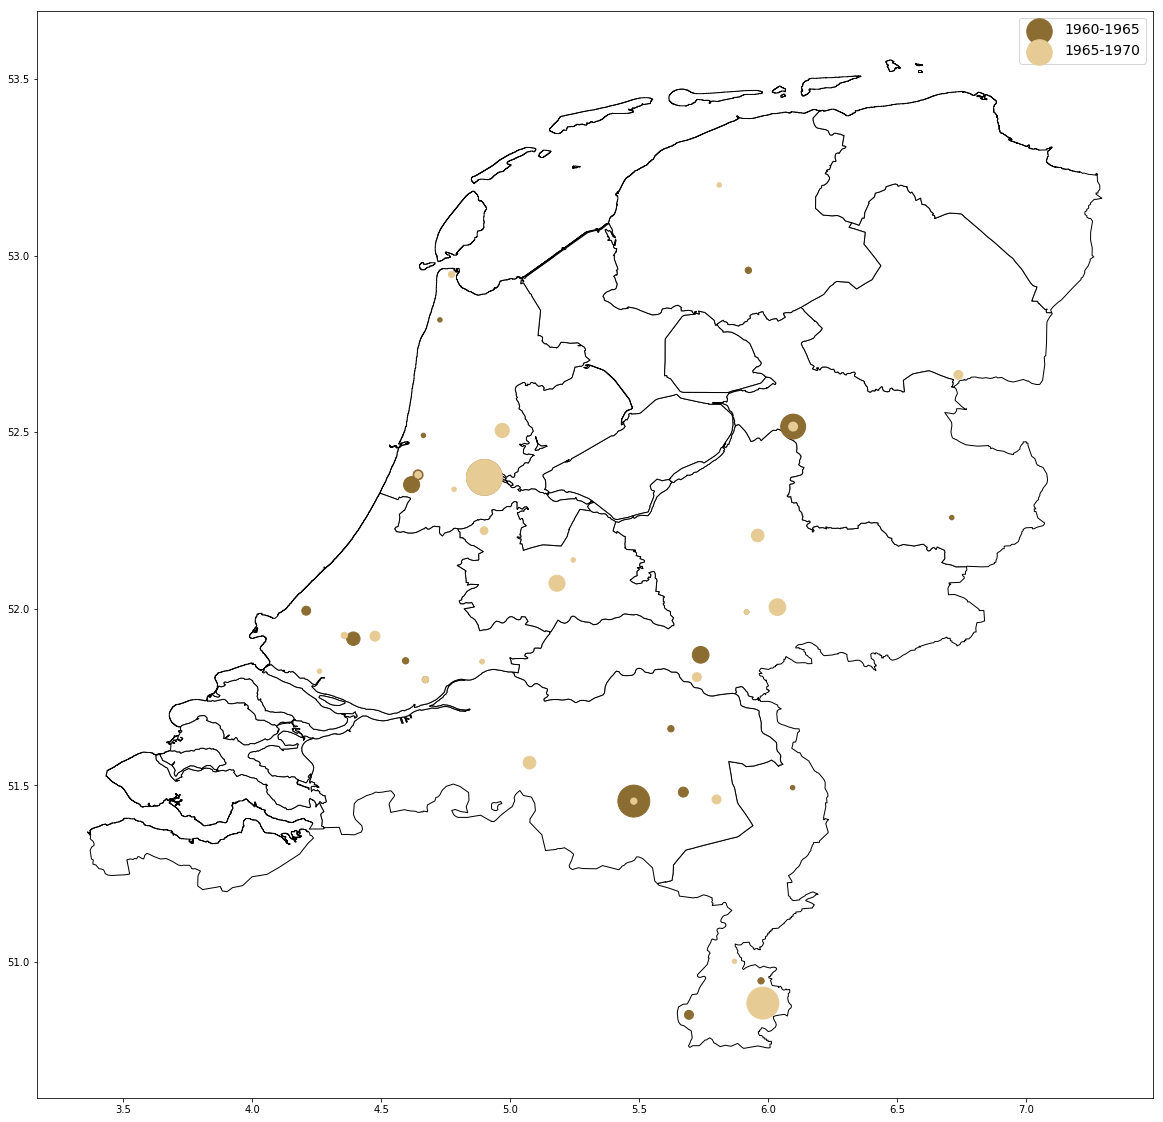

In [19]:
#  and if we single out the sixties

fig, ax = plt.subplots(figsize=(20,20))
neth.plot( color="white", edgecolor="black", ax=ax)
geon = ygeo_units.dissolve(by=ygeo_units.placename, aggfunc='count')
for item in ['1960-1965', '1965-1970']:
    if item != np.nan:
        ygeo_units[cats == item].plot(
                    color=clrnames[item], markersize=geon.placename * 20 , ax=ax, label=item) # slightly inflate size of dots for better visual
        plt.legend(prop={'size':14})

For the whole database we need to extrapolate this. As this is a 1% sample, the simplest prediction is multiplying the values by 100, which will give some but not that many distortions (especially on province level I would think proportions remain the same. And fortunately, we can manipulate this by changing the multiplication value of the markers

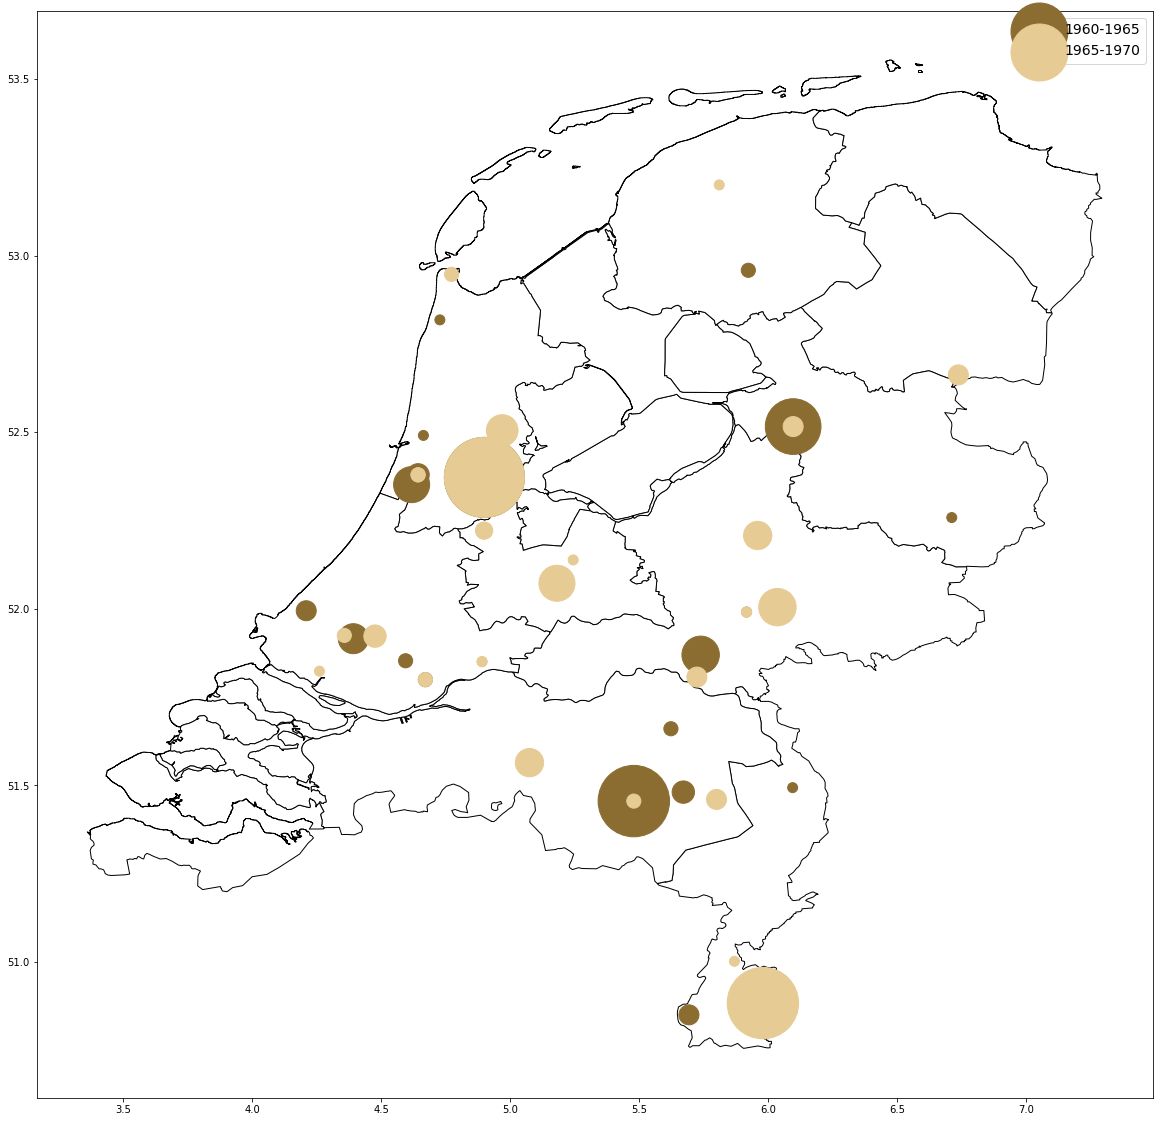

In [20]:
#  and if we single out the sixties

fig, ax = plt.subplots(figsize=(20,20))
neth.plot( color="white", edgecolor="black", ax=ax)
geon = ygeo_units.dissolve(by=ygeo_units.placename, aggfunc='count')
for item in ['1960-1965', '1965-1970']:
    if item != np.nan:
        ygeo_units[cats == item].plot(
                    color=clrnames[item], markersize=geon.placename * 100 , ax=ax, label=item) # slightly inflate size of dots for better visual
        plt.legend(prop={'size':14})

In [21]:
neth


,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,158,NLD,Netherlands,1,Drenthe,Provincie,Province,None,None,"POLYGON ((6.501305103302059 53.19841003417974,..."
1,158,NLD,Netherlands,2,Flevoland,Provincie,Province,None,None,(POLYGON ((5.445206165313778 52.55580902099615...
2,158,NLD,Netherlands,3,Friesland,Provincie,Province,None,Frise|Frisia|Frísia,(POLYGON ((5.249166965484562 53.25458145141607...
3,158,NLD,Netherlands,4,Gelderland,Provincie,Province,None,Geldern|Gheldria|Guelders|Gueldre,"POLYGON ((5.927334785461426 52.48263931274414,..."
4,158,NLD,Netherlands,5,Groningen,Provincie,Province,None,Groninga|Groningue,(POLYGON ((6.752500057220573 53.46569442749023...
5,158,NLD,Netherlands,6,IJsselmeer,Water body,Water body,None,None,"POLYGON ((5.000236988067684 52.34937667846685,..."
6,158,NLD,Netherlands,7,Limburg,Provincie,Province,None,Limbourg|Limburgo,"POLYGON ((5.900456905365104 51.77842330932617,..."
7,158,NLD,Netherlands,8,Noord-Brabant,Provincie,Province,None,Brabante del Norte|Brabante do Norte|Brabante ...,"POLYGON ((5.542420864105225 51.81705856323254,..."
8,158,NLD,Netherlands,9,Noord-Holland,Provincie,Province,None,Holanda do Norte|Hollande-septentrionale|North...,(POLYGON ((5.000236988067684 52.34937667846685...
9,158,NLD,Netherlands,10,Overijssel,Provincie,Province,None,None,"POLYGON ((6.138091087341422 52.84379959106457,..."


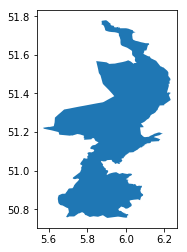

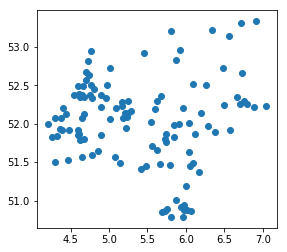

In [22]:
p = neth.loc[neth.NAME_1 == "Limburg"]
mp = gpd.GeoSeries(places.geometry, crs={'init': 'epsg:4326'})
p.plot()
mp.plot()

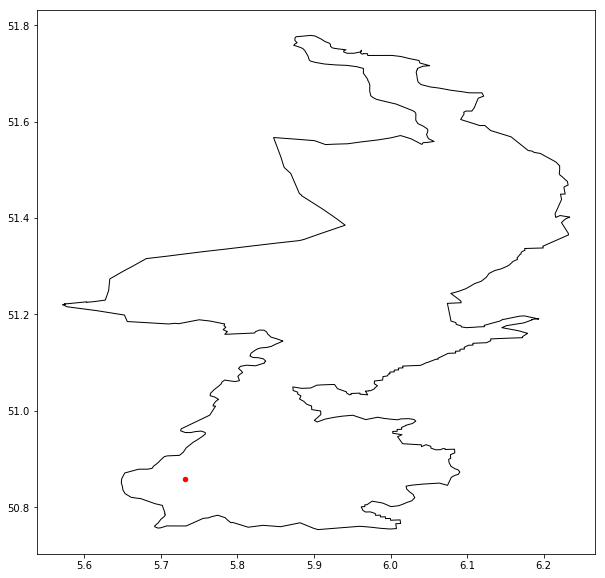

In [23]:
fig, ax= plt.subplots(figsize=(10,10))
limbabwe = p.geometry.intersection(mp)

p.plot(color="white", edgecolor="black", ax=ax)
limbabwe.plot(ax=ax, markersize=20, color="red")

In [24]:
limbabwe.loc[~limbabwe.isna()]

6    POINT (5.731146 50.859959)
dtype: object

In [25]:
nmp = mp.to_crs({"init":"epsg:4326"})
print(nmp.crs, neth.crs, p.crs, limbabwe.crs, mp.crs)

{'init': 'epsg:4326'} {'init': 'epsg:4326'} {'init': 'epsg:4326'} {'init': 'epsg:4326'} {'init': 'epsg:4326'}


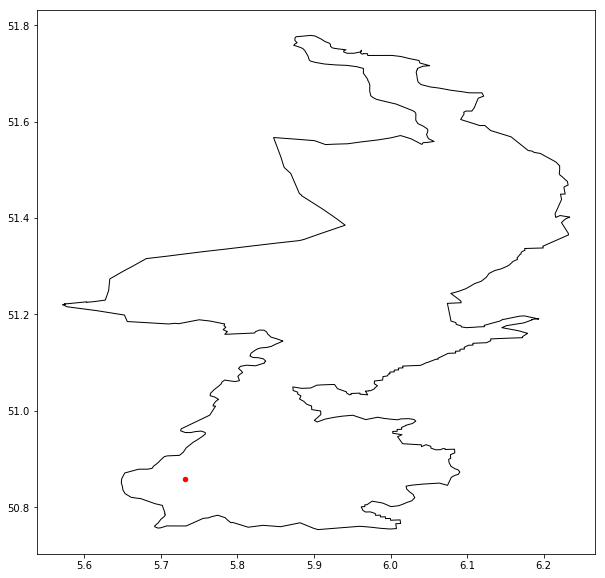

In [26]:
fig, ax= plt.subplots(figsize=(10,10))
limbabwe = p.geometry.intersection(nmp)

p.plot(color="white", edgecolor="black", ax=ax)
limbabwe.plot(ax=ax, markersize=20, color="red")

In [41]:
pprov=pd.read_csv("csvs/plces_provinces.csv", sep="\t")
places['provincie'] = pd.merge(places, pprov, left_on="placename", right_on="address")['state']
places['provincie'] = places.provincie.replace({'North Holland': 'Noord-Holland',
                         'South Holland': 'Zuid-Holland',
                         'North Brabant': 'Noord-Brabant',
                         })
nplaces = pd.merge(neth, places, left_on="NAME_1", right_on="provincie")
nplaces = nplaces.rename({'geometry_x':'geometry'}, axis=1)
nplaces

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,placename,latitude,longitude,geometry_y,provincie
0,158,NLD,Netherlands,1,Drenthe,Provincie,Province,None,None,"POLYGON ((6.501305103302059 53.19841003417974,...",Brunssum,50.946427,5.971893,POINT (5.971893 50.946427),Drenthe
1,158,NLD,Netherlands,1,Drenthe,Provincie,Province,None,None,"POLYGON ((6.501305103302059 53.19841003417974,...",Hengelo,52.260996,6.793795,POINT (6.793794999999999 52.260996),Drenthe
2,158,NLD,Netherlands,3,Friesland,Provincie,Province,None,Frise|Frisia|Frísia,(POLYGON ((5.249166965484562 53.25458145141607...,Grave,51.756738,5.737492,POINT (5.737492 51.756738),Friesland
3,158,NLD,Netherlands,3,Friesland,Provincie,Province,None,Frise|Frisia|Frísia,(POLYGON ((5.249166965484562 53.25458145141607...,Hilvarenbeek,51.487767,5.137422,POINT (5.137422 51.487767),Friesland
4,158,NLD,Netherlands,3,Friesland,Provincie,Province,None,Frise|Frisia|Frísia,(POLYGON ((5.249166965484562 53.25458145141607...,Hoensbroek,50.920115,5.931095,POINT (5.931095 50.920115),Friesland
5,158,NLD,Netherlands,4,Gelderland,Provincie,Province,None,Geldern|Gheldria|Guelders|Gueldre,"POLYGON ((5.927334785461426 52.48263931274414,...",Aalten,51.923874,6.578990,POINT (6.578989999999999 51.923874),Gelderland
6,158,NLD,Netherlands,4,Gelderland,Provincie,Province,None,Geldern|Gheldria|Guelders|Gueldre,"POLYGON ((5.927334785461426 52.48263931274414,...",Afferden,51.635102,6.036392,POINT (6.036392 51.635102),Gelderland
7,158,NLD,Netherlands,4,Gelderland,Provincie,Province,None,Geldern|Gheldria|Guelders|Gueldre,"POLYGON ((5.927334785461426 52.48263931274414,...",Apeldoorn,52.207918,5.958917,POINT (5.958917 52.207918),Gelderland
8,158,NLD,Netherlands,4,Gelderland,Provincie,Province,None,Geldern|Gheldria|Guelders|Gueldre,"POLYGON ((5.927334785461426 52.48263931274414,...",Arnhem,51.991032,5.915834,POINT (5.915833999999999 51.991032),Gelderland
9,158,NLD,Netherlands,4,Gelderland,Provincie,Province,None,Geldern|Gheldria|Guelders|Gueldre,"POLYGON ((5.927334785461426 52.48263931274414,...",Bussum,52.276420,5.169290,POINT (5.16929 52.27642),Gelderland


In [42]:
ppl = nplaces[['NAME_1', 'geometry']]

In [47]:
cplaces = nplaces.dissolve(by="NAME_1", aggfunc="count")
cplaces

,geometry,ID_0,ISO,NAME_0,ID_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,placename,latitude,longitude,geometry_y,provincie
NAME_1,,,,,,,,,,,,,,
Drenthe,"POLYGON ((6.501305103302059 53.19841003417974,...",2,2,2,2,2,2,0,0,2,2,2,2,2
Friesland,(POLYGON ((5.070277214050236 53.30708312988281...,3,3,3,3,3,3,0,3,3,3,3,3,3
Gelderland,"POLYGON ((5.927334785461426 52.48263931274414,...",15,15,15,15,15,15,0,15,15,15,15,15,15
Groningen,(POLYGON ((6.752500057220573 53.46569442749023...,2,2,2,2,2,2,0,2,2,2,2,2,2
Limburg,"POLYGON ((5.900456905365104 51.77842330932617,...",11,11,11,11,11,11,0,11,11,11,11,11,11
Noord-Brabant,"POLYGON ((5.542420864105225 51.81705856323254,...",14,14,14,14,14,14,0,14,14,14,14,14,14
Noord-Holland,"(POLYGON ((5.062808036804313 52.9419670104981,...",20,20,20,20,20,20,0,20,20,20,20,20,20
Overijssel,"POLYGON ((6.138091087341422 52.84379959106457,...",8,8,8,8,8,8,0,0,8,8,8,8,8
Utrecht,"POLYGON ((5.025735855102596 52.30279922485357,...",8,8,8,8,8,8,0,0,8,8,8,8,8


In [ ]:
pp = gpd.GeoSeries(places.pgeom, crs={'init': 'epsg:4326'})
pp.

In [44]:
places.provincie.unique()

array(['Gelderland', 'Noord-Holland', 'Overijssel', 'Zuid-Holland',
       'Limburg', 'Noord-Brabant', 'Utrecht', 'Drenthe', 'Groningen',
       'Friesland', nan], dtype=object)

In [39]:
neth.NAME_1.unique()

array(['Drenthe', 'Flevoland', 'Friesland', 'Gelderland', 'Groningen',
       'IJsselmeer', 'Limburg', 'Noord-Brabant', 'Noord-Holland',
       'Overijssel', 'Utrecht', 'Zeeland', 'Zeeuwse meren',
       'Zuid-Holland'], dtype=object)

/Users/rikhoekstra/anaconda/envs/36/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
/Users/rikhoekstra/anaconda/envs/36/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


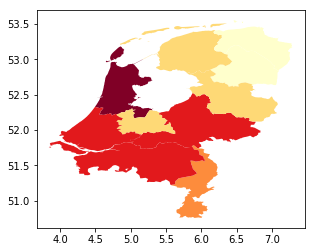

In [48]:
cplaces.plot(column = 'provincie', scheme='quantiles', cmap='YlOrRd');